In [1]:
import warnings
warnings.filterwarnings('ignore')
import math
import random
import numpy as np
import pandas as pd
from scipy.special import gamma
from sklearn.linear_model import LogisticRegression
import itertools
from matplotlib import pyplot as plt
import torch as t

def factorial(n):
    if n == 0:
        return 1
    else:
        return n*factorial(n-1)

def normalize(a, ax=0):
    m = np.min(a,axis = ax)
    M = np.max(a,axis = ax)
    return (a-m)/(M-m)

import warnings
warnings.filterwarnings('ignore')

np.set_printoptions(suppress = True)

data = pd.read_csv('data.csv').values
data = np.array(data)
np.random.shuffle(data)

len(data)


60000

In [2]:
rand = np.arange(60000)
np.random.shuffle(rand)
train_no = rand[:50000]

X = data

val_no = np.setdiff1d(rand,train_no)

X_train,X_val = X[train_no,:-1],X[val_no,:-1]
Y_train,Y_val = X[train_no,-1:],X[val_no,-1:]
Y_train.shape = (Y_train.shape[0],)  
Y_val.shape = (Y_val.shape[0],)
X_train.shape = (X_train.shape[0],X_train.shape[1])
X_val.shape = (X_val.shape[0],X_val.shape[1])

In [3]:
def changey(y, p):
    r = np.random.binomial(1,1-p,y.shape)
    x = np.random.randint(0,10,y.shape)
    return y*r+x-x*r

def changex(x, p):
    return x+np.random.normal(0,p,x.shape)

In [4]:
xtrain = []
ytrain = []

subsize = 1000



for i in range(50):
    a = np.copy(X_train[i*subsize:(i+1)*subsize])
    b = Y_train[i*subsize:(i+1)*subsize]
    norm = np.random.normal(a, i/50)
    if i%2 == 0:
        bern = np.random.binomial(1,i/100, b.shape) 
    else:
        bern = np.zeros(b.shape)
    xtrain.append(norm)
    ytrain.append(b+bern-2*b*bern)

In [5]:
xtrain = np.array(xtrain).reshape(subsize * 50, 4)
ytrain = np.array(ytrain).reshape(subsize * 50, 1)

In [6]:
train_data_n = np.concatenate((xtrain,ytrain),1)
big_data = np.copy(train_data_n)

for j in range(4):
    copy = np.copy(big_data)
    copy_2 = np.copy(big_data)
    np.random.shuffle(copy_2)

    temp = []
    for i in range(len(copy)):
        temp.append(copy[i])
        temp.append(copy_2[i])
    print(np.array(temp).shape, big_data.shape)
    big_data = np.concatenate((big_data,np.array(temp)),0)
    print(big_data.shape)
    

(100000, 5) (50000, 5)
(150000, 5)
(300000, 5) (150000, 5)
(450000, 5)
(900000, 5) (450000, 5)
(1350000, 5)
(2700000, 5) (1350000, 5)
(4050000, 5)


In [7]:
len(big_data)//500

8100

In [13]:
sub_train_size = 500

sample_size = len(big_data)//500

new_ytrain = []
new_xtrain = []

accs = np.zeros(200)

for j in range(sample_size):
    if j % 100 == 0:
        print(j,',',len(new_ytrain), end = ' ')
    
    sub_train_data = big_data[j*sub_train_size:(j+1)*sub_train_size]

    sub_x_train = sub_train_data[:,:-1]
    sub_y_train = sub_train_data[:,-1:]

    sub_y_train.shape = (sub_train_size,)

    clf = LogisticRegression()
    clf.fit(sub_x_train, sub_y_train)
    predictions = clf.predict(X_val)

    accuracy = np.mean(predictions == Y_val)
    
    k = int((accuracy-0.5)*400)
    if accs[k]<50:
        new_ytrain.append(accuracy)
        new_xtrain.append(copy[:sub_train_size])
        accs[k]+=1
        
        
for j in range(len(train_data_n)-500):
    if j % 100 == 0:
        print(j,',',len(new_ytrain), end = ' ')
    
    sub_train_data = train_data_n[j:j+sub_train_size]

    sub_x_train = sub_train_data[:,:-1]
    sub_y_train = sub_train_data[:,-1:]

    sub_y_train.shape = (sub_train_size,)

    clf = LogisticRegression()
    clf.fit(sub_x_train, sub_y_train)
    predictions = clf.predict(X_val)

    accuracy = np.mean(predictions == Y_val)
    
    k = int((accuracy-0.5)*400)
    if accs[k]<50:
        new_ytrain.append(accuracy)
        new_xtrain.append(copy[:sub_train_size])
        accs[k]+=1
        

0 , 0 100 , 100 200 , 200 300 , 300 400 , 400 500 , 500 600 , 600 700 , 700 800 , 800 900 , 900 1000 , 1000 1100 , 1095 1200 , 1170 1300 , 1225 1400 , 1287 1500 , 1355 1600 , 1395 1700 , 1441 1800 , 1483 1900 , 1534 2000 , 1570 2100 , 1597 2200 , 1630 2300 , 1654 2400 , 1689 2500 , 1720 2600 , 1761 2700 , 1797 2800 , 1809 2900 , 1854 3000 , 1870 3100 , 1889 3200 , 1922 3300 , 1969 3400 , 1980 3500 , 1997 3600 , 2027 3700 , 2063 3800 , 2071 3900 , 2092 4000 , 2111 4100 , 2127 4200 , 2146 4300 , 2175 4400 , 2206 4500 , 2237 4600 , 2243 4700 , 2252 4800 , 2275 4900 , 2304 5000 , 2312 5100 , 2324 5200 , 2335 5300 , 2350 5400 , 2365 5500 , 2384 5600 , 2405 5700 , 2430 5800 , 2438 5900 , 2450 6000 , 2462 6100 , 2474 6200 , 2488 6300 , 2499 6400 , 2513 6500 , 2533 6600 , 2545 6700 , 2553 6800 , 2565 6900 , 2577 7000 , 2588 7100 , 2595 7200 , 2606 7300 , 2614 7400 , 2622 7500 , 2629 7600 , 2635 7700 , 2645 7800 , 2659 7900 , 2671 8000 , 2683 0 , 2696 100 , 2774 200 , 2874 300 , 2974 400 , 3058

8178


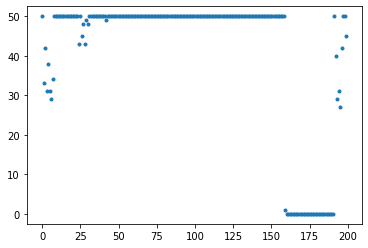

In [15]:
print(len(new_ytrain))
plt.plot(accs,'.')
plt.show()

In [73]:
np.random.seed(1000)
np.random.shuffle(new_xtrain)
np.random.seed(1000)
np.random.shuffle(new_ytrain)

In [74]:
t.save(t.tensor(new_xtrain),'new_xtrain.pt')
t.save(t.tensor(new_ytrain),'new_ytrain.pt')

In [2]:
data

array([[0.01996664, 0.07502837, 0.03870484, 0.58489347, 0.        ],
       [0.86254881, 0.30053537, 0.50914283, 0.46915251, 1.        ],
       [0.16700914, 0.99209517, 0.40704909, 0.55397992, 1.        ],
       ...,
       [0.48621389, 0.97540449, 0.6886619 , 0.52392252, 1.        ],
       [0.32812737, 0.08335982, 0.16538633, 0.60135798, 0.        ],
       [0.42405844, 1.08734954, 0.67904326, 0.66858497, 1.        ]])

In [29]:
rand = np.arange(60000)
np.random.shuffle(rand)
train_no = rand[:50000]

X = data

val_no = np.setdiff1d(rand,train_no)

X_train,X_val = X[train_no,:-1],X[val_no,:-1]
Y_train,Y_val = X[train_no,-1:],X[val_no,-1:]
Y_train.shape = (Y_train.shape[0],)  
Y_val.shape = (Y_val.shape[0],)
X_train.shape = (X_train.shape[0],X_train.shape[1])
X_val.shape = (X_val.shape[0],X_val.shape[1])

In [30]:
clf = LogisticRegression()
clf.fit(X_train, Y_train)
predictions = clf.predict(X_val)

In [31]:
predictions

array([1., 0., 0., ..., 1., 0., 0.])

In [32]:
Y_val==predictions

array([ True,  True,  True, ...,  True,  True,  True])

In [33]:
np.mean(Y_val==predictions)

0.9865

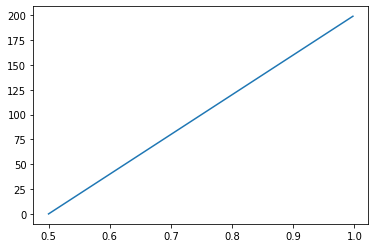

In [22]:
x = np.array([i/400 for i in range(200,400)])
plt.plot(x,(x-0.5)*400)
plt.show()

In [23]:
(x-0.5)*400

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [69]:
a = np.random.randint(0,9,(5,2,2))
b = np.random.uniform(0,1,(5,1))

In [70]:
for i in range(5):
    print(a[i], b[i])

[[3 6]
 [2 5]] [0.35071497]
[[8 5]
 [6 6]] [0.3567042]
[[7 6]
 [3 4]] [0.87796415]
[[8 1]
 [3 7]] [0.49604127]
[[2 0]
 [4 4]] [0.99237352]


In [71]:
np.random.seed(1000)
np.random.shuffle(a)
np.random.seed(1000)
np.random.shuffle(b)

In [72]:
for i in range(5):
    print(a[i], b[i])

[[7 6]
 [3 4]] [0.87796415]
[[8 5]
 [6 6]] [0.3567042]
[[3 6]
 [2 5]] [0.35071497]
[[2 0]
 [4 4]] [0.99237352]
[[8 1]
 [3 7]] [0.49604127]
